### Data source 
#### https://www.kaggle.com/c/dogs-vs-cats

you need to divide data into train and val like

- Data
    - train
        - dog
        - cat
    - val
        - dog
        - cat


In [39]:
import numpy as np
import PIL.Image as PIL
import tensorflow as tf
from tensorflow import keras as ks

In [54]:
train_dataGen = ks.preprocessing.image.ImageDataGenerator(rescale=1/255)
Train_data = train_dataGen.flow_from_directory(
    directory="./Data/Short/train/",
    batch_size=20,
    target_size=(150 ,150),
    class_mode="binary"
)
validation_dataGen = ks.preprocessing.image.ImageDataGenerator(rescale=1/255)
Validation_data = validation_dataGen.flow_from_directory(
    directory="./Data/Short/val/",
    batch_size=20,
    target_size=(150 ,150),
    class_mode="binary"
)
# test_dataGen = ks.preprocessing.image.ImageDataGenerator(rescale=1/255)
# Test_data = test_dataGen.flow_from_directory(
#     directory="./Data/SadFace/test/",
#     batch_size=64,
#     target_size=(32 ,32),
# )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [56]:
model = ks.models.Sequential([
    ks.layers.Conv2D(16 , (3,3) , activation="relu", input_shape=(150,150,3)),
    ks.layers.MaxPool2D(),
    ks.layers.Conv2D(32 , (3,3) , activation="relu"),
    ks.layers.MaxPool2D(),
    ks.layers.Conv2D(64 , (3,3) , activation="relu"),
    ks.layers.MaxPool2D(),
    ks.layers.Flatten(),
    ks.layers.Dense(512 , activation="relu"),
    ks.layers.Dense(1 , activation="sigmoid")
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 17, 17, 64)      

In [57]:
model.compile(optimizer=ks.optimizers.RMSprop(learning_rate=0.001) ,
              loss=ks.losses.binary_crossentropy ,
              metrics=["acc"])

In [58]:
hist = model.fit(Train_data , 
                validation_data=Validation_data, 
                epochs= 15 , 
                verbose=1 , 
                steps_per_epoch=100 , 
                validation_steps=50)

Epoch 1/15
100/100 [==============================] - 12s 118ms/step - loss: 0.7552 - acc: 0.5470 - val_loss: 0.6751 - val_acc: 0.6500
Epoch 2/15
100/100 [==============================] - 12s 119ms/step - loss: 0.6597 - acc: 0.6370 - val_loss: 2.6806 - val_acc: 0.5120
Epoch 3/15
100/100 [==============================] - 12s 118ms/step - loss: 0.6253 - acc: 0.6955 - val_loss: 0.5844 - val_acc: 0.7030
Epoch 4/15
100/100 [==============================] - 12s 117ms/step - loss: 0.5236 - acc: 0.7430 - val_loss: 0.5861 - val_acc: 0.6850
Epoch 5/15
100/100 [==============================] - 12s 117ms/step - loss: 0.4387 - acc: 0.8010 - val_loss: 0.7074 - val_acc: 0.7020
Epoch 6/15
100/100 [==============================] - 12s 118ms/step - loss: 0.3291 - acc: 0.8505 - val_loss: 0.6911 - val_acc: 0.7130
Epoch 7/15
100/100 [==============================] - 12s 119ms/step - loss: 0.2470 - acc: 0.8880 - val_loss: 0.9977 - val_acc: 0.6850
Epoch 8/15
100/100 [==============================] - 1

In [64]:

img = ks.utils.load_img("./Data/test1/test1/5.jpg" , target_size=(150,150))
a = ks.utils.img_to_array(img)
a = np.expand_dims(a , axis=0)
print(a.shape)
a /= 255


classes = model.predict(a)


if classes[0] > 0.5:
    print("dog")
else :
    print("cat")

(1, 150, 150, 3)
1/1 [==============================] - 0s 15ms/step
cat


In [66]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

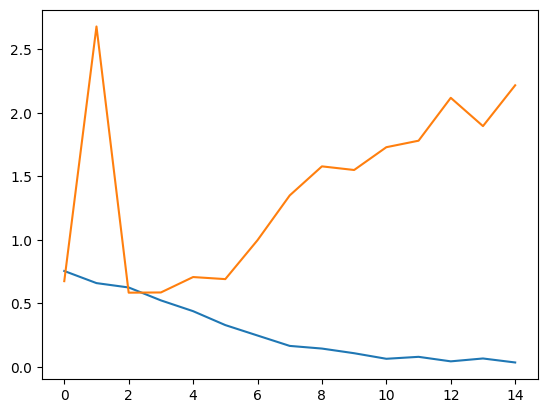

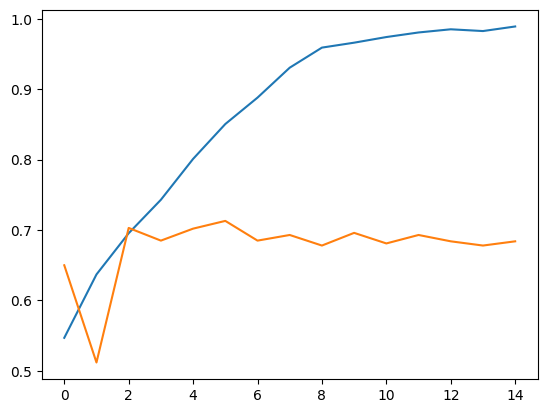

In [69]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.figure()



plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

1/1 [==============================] - 0s 48ms/step


C:\Users\Computer.Kosar\AppData\Local\Temp\ipykernel_8052\590522002.py:46: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


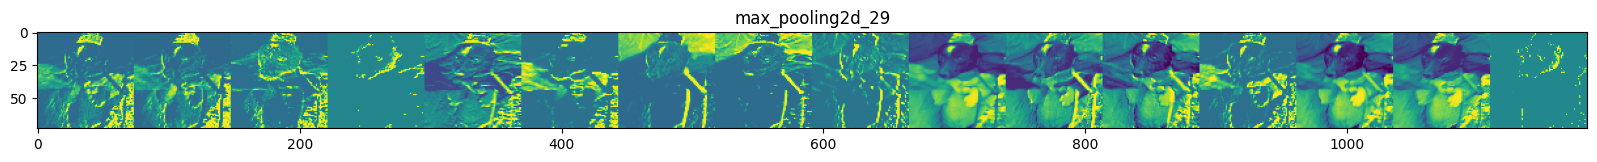

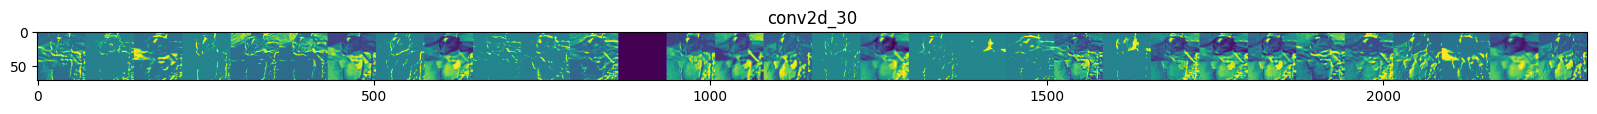

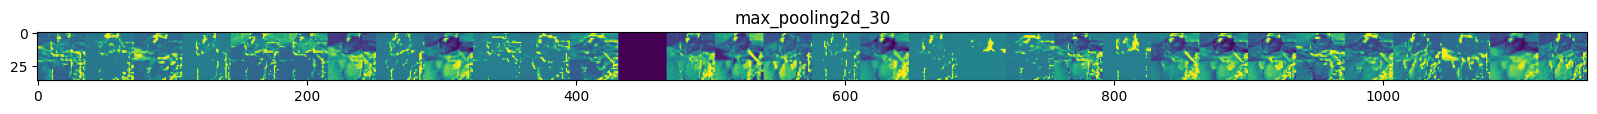

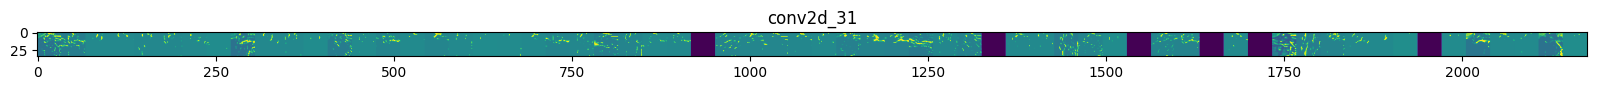

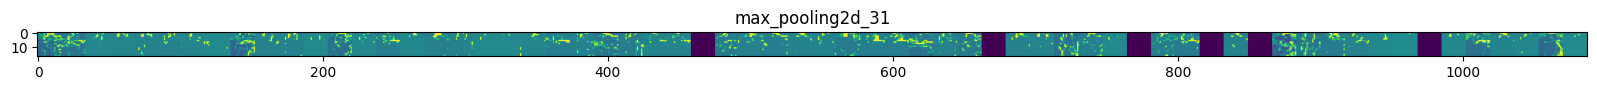

In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.

img_path = "./Data/test1/test1/1.jpg"
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')